### import necessary libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Convolution2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_datagen=ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,
                                 horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1./255)

In [ ]:
x_train=train_datagen.flow_from_directory("/content/drive/MyDrive/ECGDataset/ECG-Images/train", target_size=(64,64),batch_size=64,class_mode="categorical")
x_test=test_datagen.flow_from_directory("/content/drive/MyDrive/ECGDataset/ECG-Images/test",
                                          target_size=(64,64),batch_size=64,class_mode="categorical")

Found 15341 images belonging to 6 classes.
Found 6825 images belonging to 6 classes.


In [ ]:
print(x_train.class_indices)

{'Left Bundle Branch Block': 0, 'Normal': 1, 'Premature Atrial Contraction': 2, 'Premature Ventricular Contractions': 3, 'Right Bundle Branch Block': 4, 'Ventricular Fibrillation': 5}


In [ ]:
model=Sequential()

In [ ]:
#adding convolution layer(no.of filters,filter size,input shape,activation function)
model.add(Convolution2D(32,(3,3),input_shape=(64,64,3),activation="relu"))

In [ ]:
#adding max pooling layer(pool_size)
model.add(MaxPooling2D(pool_size=(2,2)))

In [ ]:
#input layer of ann
model.add(Flatten())

In [ ]:
#add hidden layer(no.of neurons,activation=relu,weights)
model.add(Dense(units=128,activation="relu"))

In [ ]:
#add output layer(no.of output classes=5,activation function=softmax)
model.add(Dense(units=6,activation="softmax"))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 30752)             0         
                                                                 
 dense (Dense)               (None, 128)               3936384   
                                                                 
 dense_1 (Dense)             (None, 6)                 774       
                                                                 
Total params: 3,938,054
Trainable params: 3,938,054
Non-trainable params: 0
______________________________________________

In [ ]:
#configure the learning process(loss fucntion,accuracy,optimizer)
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [ ]:
`

Epoch 1/50
239/239 [==============================] - 4699s 20s/step - loss: 1.1812 - accuracy: 0.5859 - val_loss: 0.8609 - val_accuracy: 0.6648
Epoch 2/50
239/239 [==============================] - 65s 273ms/step - loss: 0.4554 - accuracy: 0.8547 - val_loss: 0.5361 - val_accuracy: 0.7892
Epoch 3/50
239/239 [==============================] - 64s 267ms/step - loss: 0.3088 - accuracy: 0.9046 - val_loss: 0.4432 - val_accuracy: 0.8383
Epoch 4/50
239/239 [==============================] - 64s 268ms/step - loss: 0.2617 - accuracy: 0.9216 - val_loss: 0.4201 - val_accuracy: 0.8499
Epoch 5/50
239/239 [==============================] - 64s 267ms/step - loss: 0.2294 - accuracy: 0.9314 - val_loss: 0.4276 - val_accuracy: 0.8632
Epoch 6/50
239/239 [==============================] - 64s 268ms/step - loss: 0.2083 - accuracy: 0.9386 - val_loss: 0.3700 - val_accuracy: 0.8897
Epoch 7/50
239/239 [==============================] - 65s 272ms/step - loss: 0.2013 - accuracy: 0.9410 - val_loss: 0.3515 - val_ac

In [ ]:
model.save("heart.h5")

### Testing

In [ ]:
from tensorflow.keras.models import load_model
from keras.preprocessing import image
import numpy as np

In [ ]:
model=load_model("heart.h5")

In [ ]:
img=image.load_img("/content/drive/MyDrive/ECGDataset/ECG-Images/test/Ventricular Fibrillation/VFEfig_122.png",target_size=(64,64))

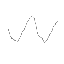

In [ ]:
img

In [ ]:
x=image.img_to_array(img)

In [ ]:
x

array([[[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       ...,

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 2

In [ ]:
x.shape

(64, 64, 3)

In [ ]:
x=np.expand_dims(x,axis=0)

In [ ]:
x.shape

(1, 64, 64, 3)

In [ ]:
y=model.predict(x)
pred=np.argmax(y, axis=1)

In [ ]:
y

array([[0., 0., 0., 0., 0., 1.]], dtype=float32)

In [ ]:
pred

array([5])

In [ ]:
x_train.class_indices

{'Left Bundle Branch Block': 0,
 'Normal': 1,
 'Premature Atrial Contraction': 2,
 'Premature Ventricular Contractions': 3,
 'Right Bundle Branch Block': 4,
 'Ventricular Fibrillation': 5}